# NLP Analysis of New York Times Best-Selling Non-Fiction Books (Using NLTK and spaCy)

## Data Acquisition

### Description:
We extracted the book data (Title, Author, Publisher, Description) from the New York Times Best Sellers page for Non-Fiction books.

The dataset includes textual descriptions of each book, which will be used for various NLP tasks.

The final dataset is saved as a CSV file named **nyt_books_clean.csv**.

In [3]:
import urllib.request
from bs4 import BeautifulSoup
import csv

# Step 1: Fetch the webpage
url = 'https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-nonfiction/'
request = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
content = urllib.request.urlopen(request)

# Step 2: Parse the HTML
soup = BeautifulSoup(content, 'html.parser')

# Step 3: Find all book list items
books = soup.find_all('li', attrs={'class': 'css-sggj6j'})

# Step 4: Write to CSV
with open('nyt_books_clean.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Title', 'Author', 'Publisher', 'Description'])  # No Image column

    for book in books:
        title_tag = book.find('h3', class_='css-2jegzb')
        author_tag = book.find('p', class_='css-1aaqvca')
        publisher_tag = book.find('p', class_='css-1w6oav3')
        description_tag = book.find('p', class_='css-17af87k')

        title = title_tag.get_text(strip=True) if title_tag else 'N/A'
        author = author_tag.get_text(strip=True).replace('by ', '') if author_tag else 'N/A'
        publisher = publisher_tag.get_text(strip=True) if publisher_tag else 'N/A'
        description = description_tag.get_text(strip=True) if description_tag else 'N/A'

        writer.writerow([title, author, publisher, description])


# NLP Workflow Using NLTK

## Text Analysis Using NLTK Library

### Description:
In this notebook, we apply fundamental NLP techniques using NLTK, including:

* Sentence Tokenization

* Word Tokenization

* Regex Tokenizer

* Tweet Tokenizer

* Part-of-Speech (POS) Tagging

* Named Entity Recognition (NER)

* Text Cleaning (lowercasing, stopword removal, punctuation removal)

* Word Frequency Analysis (Top 10 most frequent words)

* Sentiment Analysis (using NLTK's VADER Sentiment Analyzer)

* WordCloud Visualization of common words

Each step is implemented with clear explanation and example outputs for better understanding.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package w


--- Sentence Tokenization Example ---
['A New York Times opinion columnist and a staff writer at The Atlantic evaluate obstacles to American progress.']

--- Word Tokenization Example ---
['A', 'New', 'York', 'Times', 'opinion', 'columnist', 'and', 'a', 'staff', 'writer', 'at', 'The', 'Atlantic', 'evaluate', 'obstacles', 'to', 'American', 'progress', '.']

--- Regex Tokenizer Example ---
['A', 'New', 'York', 'Times', 'opinion', 'columnist', 'and', 'a', 'staff', 'writer', 'at', 'The', 'Atlantic', 'evaluate', 'obstacles', 'to', 'American', 'progress']

--- Tweet Tokenizer Example ---
['A', 'New', 'York', 'Times', 'opinion', 'columnist', 'and', 'a', 'staff', 'writer', 'at', 'The', 'Atlantic', 'evaluate', 'obstacles', 'to', 'American', 'progress', '.']

--- POS Tagging Example ---
[('A', 'DT'), ('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP'), ('opinion', 'NN'), ('columnist', 'NN'), ('and', 'CC'), ('a', 'DT'), ('staff', 'NN'), ('writer', 'NN'), ('at', 'IN'), ('The', 'DT'), ('Atlantic', '

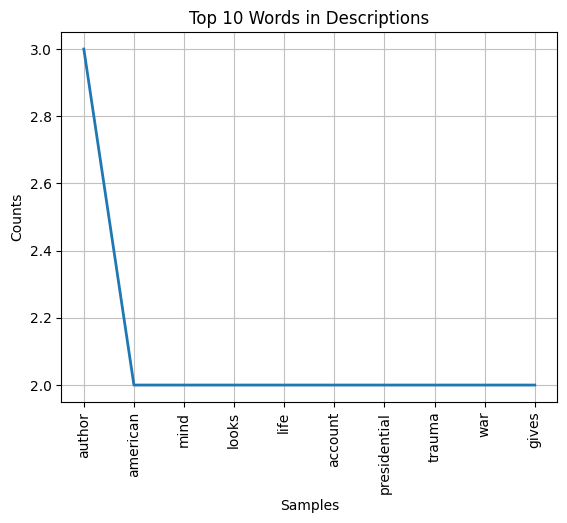

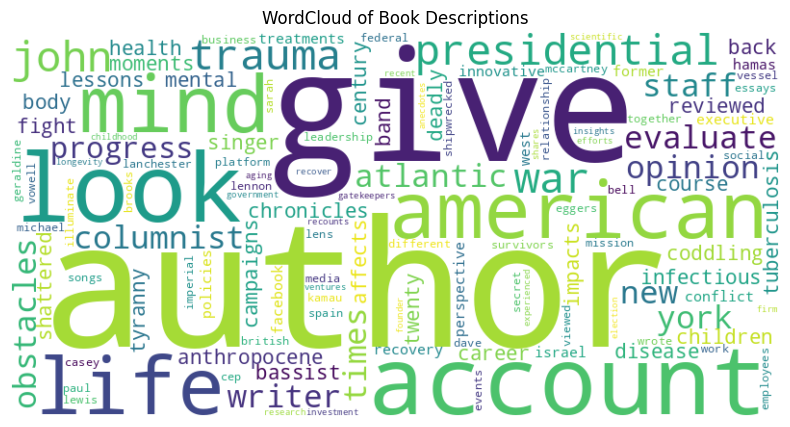

In [7]:
# NLP Workflow on NYT Book Descriptions using NLTK

# Step 1: Load Libraries and Dataset
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

# Download required NLTK data files
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')

nltk.download('words')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('/content/nyt_books_clean.csv')

# Focus on the 'Description' column and remove any missing entries
descriptions = df['Description'].dropna().tolist()

# Step 2: Tokenization (NLTK)
print("\n--- Sentence Tokenization Example ---")
# Tokenize an example description into sentences
example_text = descriptions[0]
sentences = sent_tokenize(example_text)
print(sentences)

print("\n--- Word Tokenization Example ---")
# Tokenize the example description into words
words = word_tokenize(example_text)
print(words)

print("\n--- Regex Tokenizer Example ---")
# Use regex to tokenize only words, ignoring punctuation
regex_tokenizer = RegexpTokenizer(r'\w+')
regex_tokens = regex_tokenizer.tokenize(example_text)
print(regex_tokens)

print("\n--- Tweet Tokenizer Example ---")
# Use TweetTokenizer to handle emoticons, hashtags, and mentions
tweet_tokenizer = TweetTokenizer()
tweet_tokens = tweet_tokenizer.tokenize(example_text)
print(tweet_tokens)

# Step 3: POS Tagging
print("\n--- POS Tagging Example ---")
# Assign part-of-speech tags to each word token
pos_tags = pos_tag(words)
print(pos_tags)

# Step 4: Named Entity Recognition (NER)
print("\n--- Named Entity Recognition Example ---")
# Perform NER by parsing the POS-tagged tokens
ner_tree = ne_chunk(pos_tags)
print(ner_tree)

# Step 5: Text Cleaning
print("\n--- Cleaning Text ---")
# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
cleaned_tokens = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
print(cleaned_tokens)

# Step 6: Word Frequency Analysis
print("\n--- Word Frequency Analysis ---")
# Gather all tokens from all descriptions, clean them, and calculate frequency
total_tokens = []
for desc in descriptions:
    tokens = word_tokenize(desc.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    total_tokens.extend(tokens)

# Generate frequency distribution
fdist = nltk.FreqDist(total_tokens)
print(fdist.most_common(10))

# Plot the Top 10 Most Common Words
fdist.plot(10, title="Top 10 Words in Descriptions")

# Step 7: Sentiment Analysis
print("\n--- Sentiment Analysis ---")
# Analyze the sentiment (positive/neutral/negative) of each description
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
print(df[['Title', 'Sentiment']].head())

# Step 8: WordCloud Visualization
# Generate and display a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(total_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Book Descriptions')
plt.show()


# NLP Workflow Using spaCy

 ## Text Analysis Using spaCy Library

### Description:
In this notebook, we re-implement the NLP workflow using spaCy, a modern and faster NLP library.
The tasks covered are:

* Sentence Tokenization

* Word Tokenization

* Part-of-Speech (POS) Tagging

* Named Entity Recognition (NER)

* Text Cleaning (lowercasing, stopword removal, punctuation removal)

* Word Frequency Analysis (Top 10 most frequent words)

* Sentiment Analysis (using TextBlob as spaCy does not have built-in sentiment)

* WordCloud Visualization of cleaned tokens

This allows a direct comparison of how both NLTK and spaCy handle basic NLP tasks.


--- Sentence Tokenization Example ---
['A New York Times opinion columnist and a staff writer at The Atlantic evaluate obstacles to American progress.']

--- Word Tokenization Example ---
['A', 'New', 'York', 'Times', 'opinion', 'columnist', 'and', 'a', 'staff', 'writer', 'at', 'The', 'Atlantic', 'evaluate', 'obstacles', 'to', 'American', 'progress', '.']

--- POS Tagging Example ---
[('A', 'DET'), ('New', 'PROPN'), ('York', 'PROPN'), ('Times', 'PROPN'), ('opinion', 'NOUN'), ('columnist', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('staff', 'NOUN'), ('writer', 'NOUN'), ('at', 'ADP'), ('The', 'DET'), ('Atlantic', 'PROPN'), ('evaluate', 'VERB'), ('obstacles', 'NOUN'), ('to', 'ADP'), ('American', 'ADJ'), ('progress', 'NOUN'), ('.', 'PUNCT')]

--- Named Entity Recognition Example ---
[('New York Times', 'ORG'), ('Atlantic', 'LOC'), ('American', 'NORP')]

--- Cleaning Text ---
['new', 'york', 'times', 'opinion', 'columnist', 'staff', 'writer', 'atlantic', 'evaluate', 'obstacles', 'american',

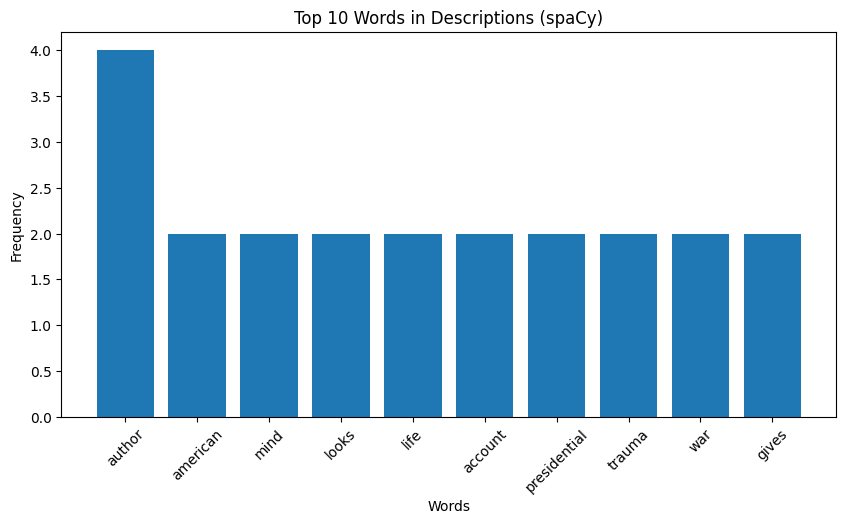


--- Sentiment Analysis ---
                        Title  Sentiment
0                   ABUNDANCE   0.028788
1  EVERYTHING IS TUBERCULOSIS  -0.200000
2      THE ANXIOUS GENERATION  -0.050000
3                  ON TYRANNY   0.000000
4                       FIGHT   0.000000


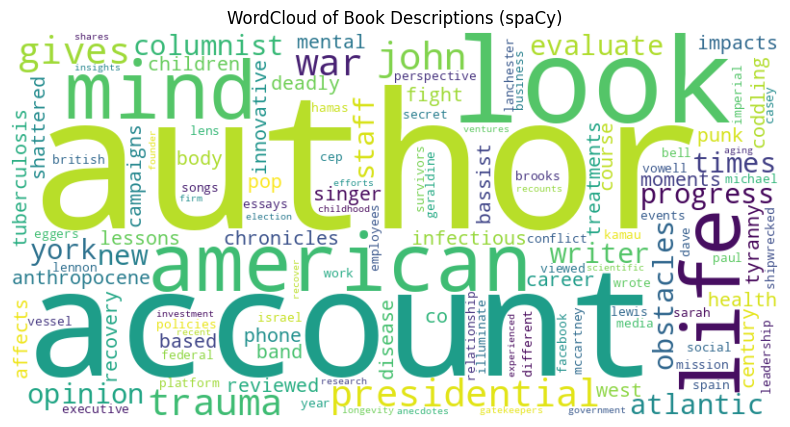

In [8]:
# NLP Workflow on NYT Book Descriptions using spaCy

# Step 1: Load Libraries and Dataset
import pandas as pd
import spacy
from spacy.tokens import Doc
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the dataset
df = pd.read_csv('/content/nyt_books_clean.csv')

# Focus on the 'Description' column and remove any missing entries
descriptions = df['Description'].dropna().tolist()

# Step 2: Tokenization (spaCy)
print("\n--- Sentence Tokenization Example ---")
example_text = descriptions[0]
doc = nlp(example_text)
sentences = [sent.text for sent in doc.sents]
print(sentences)

print("\n--- Word Tokenization Example ---")
words = [token.text for token in doc]
print(words)

# Step 3: POS Tagging
print("\n--- POS Tagging Example ---")
pos_tags = [(token.text, token.pos_) for token in doc]
print(pos_tags)

# Step 4: Named Entity Recognition (NER)
print("\n--- Named Entity Recognition Example ---")
entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities)

# Step 5: Text Cleaning
print("\n--- Cleaning Text ---")
cleaned_tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
print(cleaned_tokens)

# Step 6: Word Frequency Analysis
print("\n--- Word Frequency Analysis ---")
all_tokens = []
for desc in descriptions:
    doc = nlp(desc)
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    all_tokens.extend(tokens)

# Generate frequency distribution
counter = Counter(all_tokens)
print(counter.most_common(10))

# Plot Top 10 Words
plt.figure(figsize=(10,5))
words, counts = zip(*counter.most_common(10))
plt.bar(words, counts)
plt.title('Top 10 Words in Descriptions (spaCy)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Step 7: Sentiment Analysis (simple rule-based approach)
# Note: spaCy does not have built-in sentiment analyzer like NLTK VADER
# We'll use TextBlob temporarily for sentiment
from textblob import TextBlob

print("\n--- Sentiment Analysis ---")
df['Sentiment'] = df['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print(df[['Title', 'Sentiment']].head())

# Step 8: WordCloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Book Descriptions (spaCy)')
plt.show()
